In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.models as models
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np


Bad key "text.kerning_factor" on line 4 in
C:\Users\mec-lab\Anaconda3\envs\image_processing_hw1_5\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [64]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [65]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=8,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=8,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [66]:
net = models.vgg16(pretrained=False)
net.classifier._modules['6'] = nn.Linear(4096, 10)
feature = torch.nn.Sequential(*list(net.children())[:])
net.to(device)
print(feature)

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [67]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [69]:
loss_history= []
train_acc = []
test_acc = []
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    loss_history.append(running_loss / 6250)    
    print('[%d, %5d] loss: %.3f' %
                 (epoch + 1, i + 1, running_loss / 6250))
    running_loss = 0.0
    
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (
        100 * correct / total))
    test_acc.append(correct / total) 
    
    correct = 0
    total = 0
    with torch.no_grad():
        for data in trainloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 50000 train images: %d %%' % (
        100 * correct / total))
    train_acc.append(correct / total) 

print('Finished Training')

[1,  6250] loss: 1.840
Accuracy of the network on the 10000 test images: 46 %
Accuracy of the network on the 50000 train images: 46 %
[2,  6250] loss: 1.271
Accuracy of the network on the 10000 test images: 60 %
Accuracy of the network on the 50000 train images: 62 %
[3,  6250] loss: 0.979
Accuracy of the network on the 10000 test images: 65 %
Accuracy of the network on the 50000 train images: 68 %
[4,  6250] loss: 0.790
Accuracy of the network on the 10000 test images: 73 %
Accuracy of the network on the 50000 train images: 77 %
[5,  6250] loss: 0.653
Accuracy of the network on the 10000 test images: 75 %
Accuracy of the network on the 50000 train images: 82 %
[6,  6250] loss: 0.541
Accuracy of the network on the 10000 test images: 75 %
Accuracy of the network on the 50000 train images: 83 %
[7,  6250] loss: 0.447
Accuracy of the network on the 10000 test images: 78 %
Accuracy of the network on the 50000 train images: 88 %
[8,  6250] loss: 0.370
Accuracy of the network on the 10000 te

In [70]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

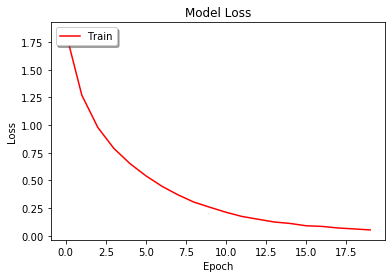

In [75]:
#Model Loss
x = []
for i in range(20):
    x.append(i)
plt.title("Model Loss") 
plt.xlabel("Epoch") 
plt.ylabel("Loss")
plt.plot(x,loss_history,'-',color='red',label='Train')
plt.legend(loc='upper left', shadow=True)

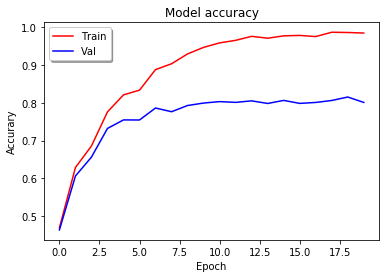

In [76]:
#Model accuracy
x = []
for i in range(20):
    x.append(i)
plt.title("Model accuracy") 
plt.xlabel("Epoch") 
plt.ylabel("Accurary")
plt.plot(x,train_acc,'-',color='red',label='Train')
plt.plot(x,test_acc,'-',color='blue',label='Val')
plt.legend(loc='upper left', shadow=True)

In [3]:
print('hyperparameters:')
print('batch size: 8')
print('learning rate: 0.001')
print('optimizer: SGD')


hyperparameters:
batch size: 8
learning rate: 0.001
optimizer: SGD
